In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

In [2]:
test_phantom = phantom.Phantom(source_path = None,
            voxel_dims = (0.5e-3,0.5e-3,0.5e-3),
            matrix_dims = (100,100,100),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=5.3, scale=0.00001, label=1)
myocardium = tissue.Tissue(name='myocardium', c=1561.3, rho=1081, sigma=30, scale=0.0001, label=2)
fat = tissue.Tissue(name='fat', c=1450, rho=920, sigma=10, scale=0.0001, label=3)

pos = 0.7

test_phantom.add_tissue_sphere((pos,-pos,0), 2, blood)
test_phantom.add_tissue_sphere((pos,0,0), 4, blood)
test_phantom.add_tissue_sphere((pos,pos,0), 8, blood)

test_phantom.add_tissue_sphere((-pos,-pos,0), 4, fat)
test_phantom.add_tissue_sphere((-pos,0,0), 8, fat)
test_phantom.add_tissue_sphere((-pos,pos,0), 2, fat)

test_phantom.add_tissue_sphere((0,-pos,0), 8, myocardium)
test_phantom.add_tissue_sphere((0,0,0), 2, myocardium)
test_phantom.add_tissue_sphere((0,pos,0), 4, myocardium)

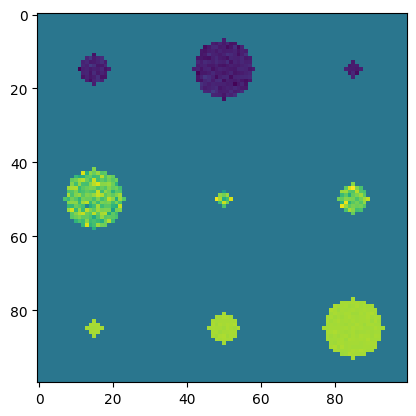

In [3]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [4]:
transducers = [transducer.Planewave(elements = 32, 
                       width = 20e-3,
                       height =  20e-3,
                       sensor_sampling_scheme = 'not_centroid', 
                       sweep = np.pi/3,
                       ray_num = 8, 
                       imaging_ndims = 2,
                       focus_elevation = 20e-3,
                       ) for i in range(1)]

for t in transducers:
    t.make_sensor_coords(test_phantom.baseline[0])

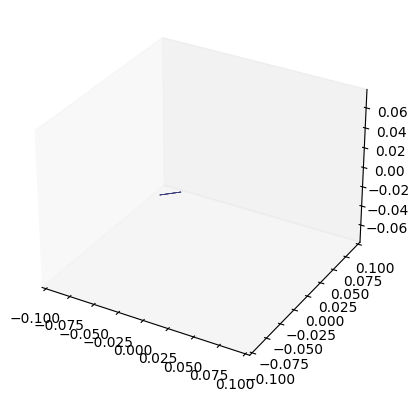

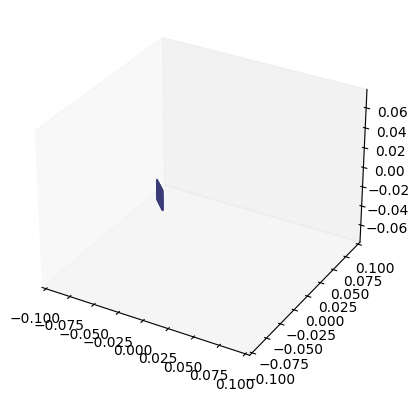

In [5]:
test_transducer_set = transducer_set.TransducerSet(transducers, seed=8888)
test_transducer_set.generate_extrinsics(shape="spherical", extrinsics_kwargs={'r_mean': 40e-3, 'view_std': 0, 'yaw_fraction': 0.5, 'pitch_fraction': 0, 'roll_fraction': 0})
test_transducer_set.plot_transducer_fovs(scale=0.1)
test_transducer_set.plot_transducer_coords(scale=0.1)

In [6]:
test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='pressure_field')

In [7]:
simprops = simulation.SimProperties(
                grid_size   = (65e-3,50e-3,20e-3),
                voxel_size  = (0.1e-3,0.1e-3,0.1e-3),
                PML_size    = (32,8,8),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [8]:
test_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/planewave_test_01',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = test_transducer_set,
                 sensor          = test_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 1,
                 additional_keys = ['p_max']
                 )

test_experiment.save()

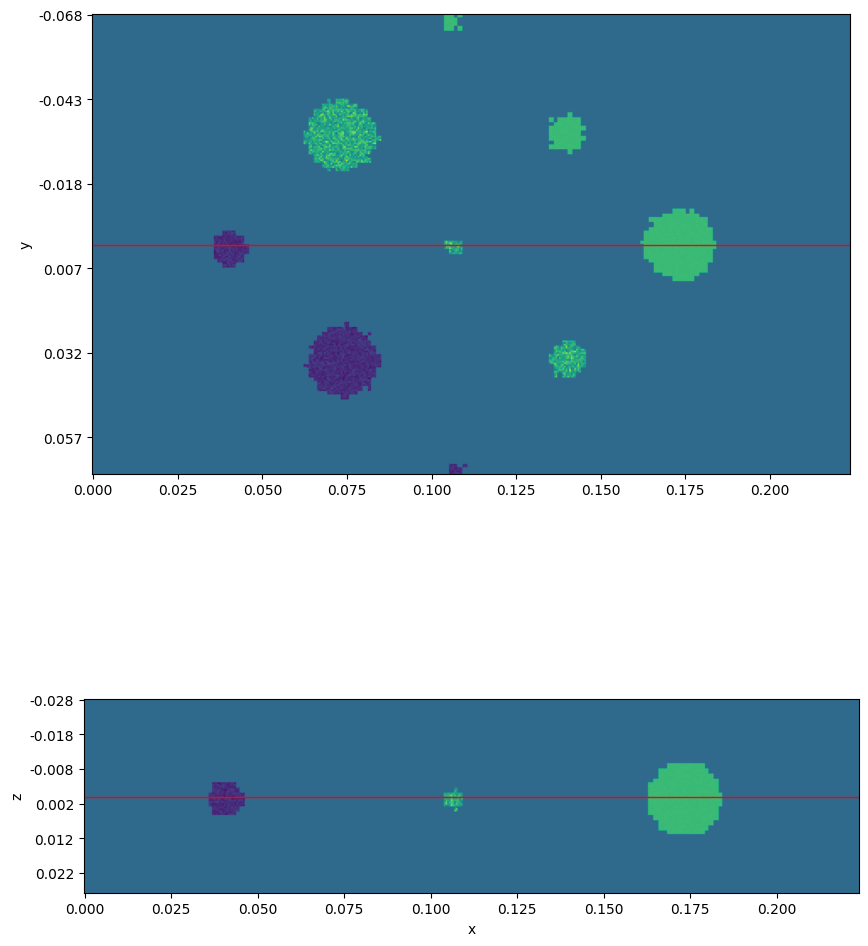

In [9]:
test_experiment.plot_ray_path(4)

In [10]:
test_experiment = experiment.Experiment.load('../experiment_files/planewave_test_01')
test_experiment.run(dry=True)

Number of simulation results (48) is greater than the expected number of simulation results (8), did the experiment parameters change since running?
dry run of simulation


100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


In [11]:
test_experiment.run(repeat=True)

running with 1 workers

preparation for sim    0 completed in            3.96 seconds
preparation for sim    1 completed in            4.52 seconds
preparation for sim    2 completed in            4.60 seconds
preparation for sim    3 completed in            4.02 seconds


┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                     0 │
│ GPU device name:               NVIDIA RTX 6000 Ada Generation │
│ Number of CPU threads:                                     32 │
│ Processor name: AMD Ryzen Threadripper PRO 5955WX 16-Cores    │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                            512 x 288 x 128 │
│ Medium type:                                               3D │
│ Simulation time steps:                                   2543 │
├───────────────────────────────────────────────────────────────┤
│         

In [12]:
test_experiment.add_results()

In [13]:
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

In [14]:
image = test_reconstruction.compound()

  0%|          | 0/48 [00:00<?, ?it/s]/home/trevor/repos/MUSiK/debugging/../core/transducer.py:334: RuntimeWarning: divide by zero encountered in true_divide
  scan_lines = kwave.utils.filters.gaussian_filter(scan_lines, 1 / (t_array[-1] / t_array.shape[0]), self.harmonic * self.get_freq(), self.bandwidth)
  0%|          | 0/48 [01:25<?, ?it/s]


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)

In [ ]:
image.shape

In [ ]:
plt.imshow(image[:,:,18])

In [ ]:
plt.imshow(image[16,:,:])

In [ ]:
plt.imshow(image[:,16,:])

In [ ]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [20]:
im = test_reconstruction.results[0][1]

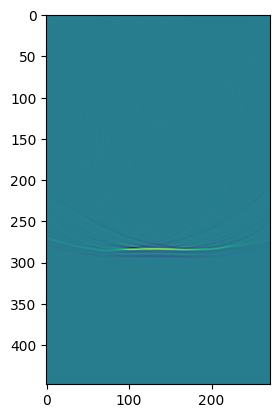

In [28]:
plt.imshow(im[...,1000])